## ハンズオン３－１　階層化クラスタリング

#### 3-1-1.py

In [2]:
#データを読み込む
import numpy as np
import pandas as pd

group1 = pd.DataFrame({'国語':[70,60,96,78],
                     '英語':[85,50,73,34],
                     '数学':[34,85,45,82],
                     '物理':[20,70,33,24]},
                   index=['田中一郎','鈴木太郎','佐藤春子','山本夏子'])

#group1を表示
group1

,国語,数学,物理,英語
田中一郎,70,34,20,85
鈴木太郎,60,85,70,50
佐藤春子,96,45,33,73
山本夏子,78,82,24,34


#### 3-1-2.py

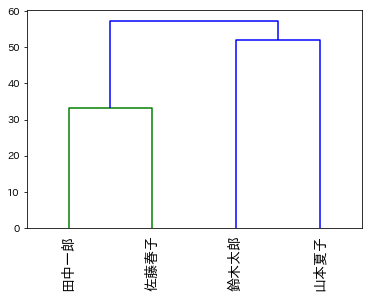

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pylab as plt

#クラスタリング
result1 = linkage(group1, method = 'single')

name = ('田中一郎','鈴木太郎','佐藤春子','山本夏子')

#デンドログラム（樹形図）の構築
dendrogram(
    result1,
    leaf_rotation=90.,  # 縦軸のラベルを９０度回転
    leaf_font_size=14.,  # フォントサイズ
    labels=name)
plt.show()



## ハンズオン３－２　６つのグループ分類手法

#### 3-2-1.py

In [4]:
group2 = pd.DataFrame({'英語':[80,90,80,70,30,90,60,50,30,70],
                     '数学':[40,80,30,80,40,20,40,70,50,75]},
                   index=['田中さん','鈴木さん','佐藤さん','山田さん','高橋さん','山本さん','吉田さん','伊藤さん','渡辺さん','小林さん'])

name =('田中さん', '鈴木さん','佐藤さん', '山田さん', '高橋さん', '山本さん',
             '吉田さん', '伊藤さん', '渡辺さん','小林さん')

#６つの手法でクラスターを併合
from scipy.cluster.hierarchy import dendrogram, linkage
import pylab as plt

#単連結法
result1 = linkage(group2, method = 'single')
#完全連結法
result2 = linkage(group2, method = 'complete')
#群平均法
result3 = linkage(group2, method = 'average')
#重心法
result4 = linkage(group2, method = 'weighted')
#ウォード法
result5 = linkage(group2, method = 'ward')
#メディアン法
result6 = linkage(group2, method = 'centroid')



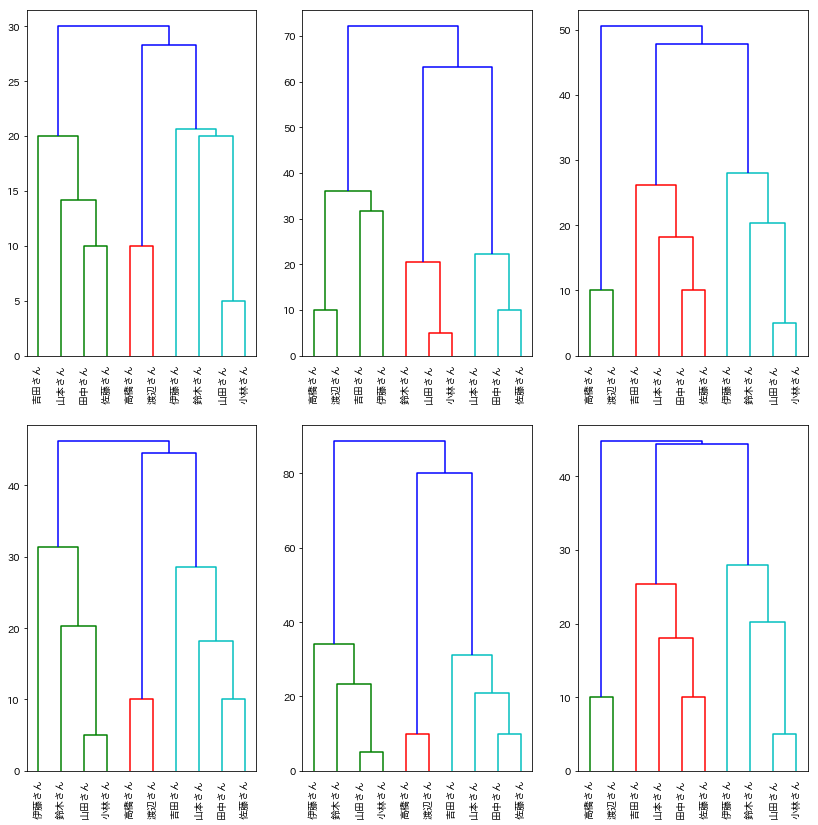

In [7]:
import pylab as plt
plt.figure(figsize=(14,14))

#result1～6までをプロット
plt.subplot(231)
dendrogram(
    result1,
    leaf_rotation=90.,  
    leaf_font_size=10., 
    labels=name
)
plt.plot()

plt.subplot(232)
dendrogram(
    result2,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.subplot(233)
dendrogram(
    result3,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.subplot(234)
dendrogram(
    result4,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.subplot(235)
dendrogram(
    result5,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.subplot(236)
dendrogram(
    result6,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=name
)
plt.plot()

plt.show()




## ハンズオン３－３　k-means++の利用

#### 3-3-1.py

In [5]:
import pandas as pd
#身長と体重のデータを読み込む
childrenk = pd.read_csv("https://raw.githubusercontent.com/futurebridge/ZukaiML/master/childrenk.csv",encoding="SHIFT-JIS")
#欠損値を削除する
childrenk = childrenk.dropna()

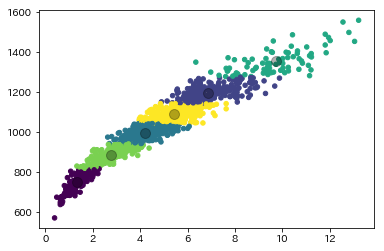

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

#kmeansのモデル生成
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
#モデルについてchildrenkデータを当てはめる
y_kmeans = kmeans.fit_predict(childrenk)
# グラフの作成
plt.scatter(childrenk.age, childrenk.length, c=y_kmeans, s=20, cmap='viridis')
#中心点を求める
centers = kmeans.cluster_centers_
#中心点をプロット
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3)

plt.show()

In [9]:
childrenk['cluster_id']=y_kmeans

In [10]:
#各クラスタの平均、個数を求める
totalm=[]
totalc=[]

for i in range(6):
    totalm.append(childrenk[childrenk['cluster_id']==i].mean())
 
for i in range(6):
    totalc.append(childrenk.cluster_id[childrenk['cluster_id']==i].count())

pd.concat([pd.DataFrame(totalm),pd.DataFrame(totalc)],axis=1)


,age,length,weight,cluster_id,0
0,1.356647,750.179641,9.831587,0.0,167
1,6.881935,1196.854839,22.840726,1.0,248
2,4.217841,997.411405,15.619756,2.0,491
3,9.722375,1357.150000,32.091250,3.0,80
4,2.752072,884.725225,12.695946,4.0,222
5,5.449645,1091.479695,18.555203,5.0,394


In [12]:
#各クラスタの標準偏差を求める
totals=[]

for i in range(6):
    totals.append(childrenk[childrenk['cluster_id']==i].std())
    
#偏差値を表示、cluster_idは同じ値なので偏差値は0
pd.DataFrame(totals)



,age,length,weight,cluster_id
0,0.383243,47.221384,1.306391,0.0
1,0.918614,34.859973,3.317637,0.0
2,0.519961,27.347085,1.290162,0.0
3,1.454939,64.297981,6.138243,0.0
4,0.630835,35.258466,1.238074,0.0
5,0.695344,28.343061,1.846454,0.0


## ハンズオン３－４　SSEによるグループ数の特定

#### 3-4-1.py

37242625.909
15220971.692
6994062.074
4262499.906
2913057.854
1963102.329
1509456.142
1200593.637
950212.26
774560.921


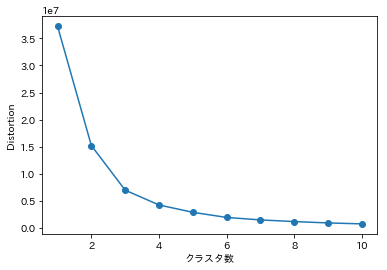

In [15]:
distortions = []

for i  in range(1,11):                
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(childrenk)                         
    inertia_= np.round(km.inertia_,3) 
    distortions.append(inertia_)  
    print (inertia_)
    
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('クラスタ数')
plt.ylabel('Distortion')
plt.show()


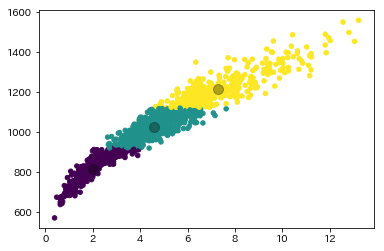

In [16]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, init='random', random_state=0)
y_kmeans = kmeans.fit_predict(childrenk)

# グラフの作成
plt.scatter(childrenk.age, childrenk.length, c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3)
plt.show()



## ハンズオン３－5　シルエット係数を求める

#### 3-5-1.py

グループ 1 ,　シルエット係数平均 0.5613447408397336 個数 346
グループ 2 ,　シルエット係数平均 0.5840056862124229 個数 853
グループ 3 ,　シルエット係数平均 0.5054363967555248 個数 403


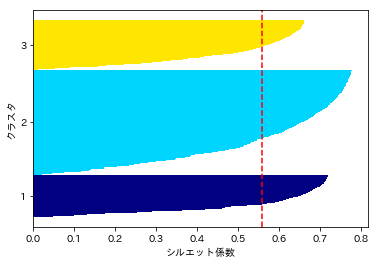

In [18]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_kmeans)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算  
silhouette_vals = silhouette_samples(childrenk,y_kmeans,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_kmeans==c]      # cluster_labelsには 0-5の値
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をグループごとに足してy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # ラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加
        print ("グループ",i+1,",　シルエット係数平均",np.mean(c_silhouette_vals),"個数",len(c_silhouette_vals))

        
silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('クラスタ')
plt.xlabel('シルエット係数')
plt.show()

In [ ]:
silhouette_avg